In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3 
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'write/GSE112393_Mus_Analysis.h5ad'

In [4]:
adata = sc.read_h5ad('write/GSE112393_Mus_QC.h5ad')  

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


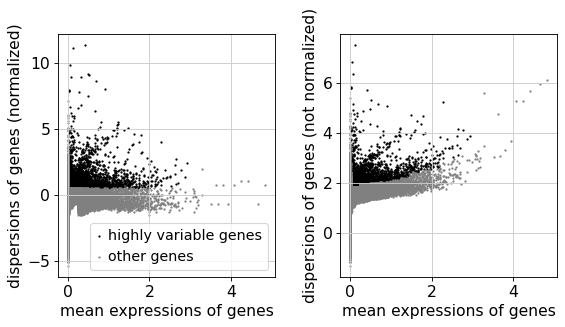

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable]

In [9]:
adata

View of AnnData object with n_obs × n_vars = 33468 × 5494
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doublet_info_colors', 'log1p', 'hvg'

In [11]:
sc.pp.regress_out(adata, ['total_counts' ,'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:02:34)


In [12]:
sc.pp.scale(adata, max_value=10)

In [13]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:07)


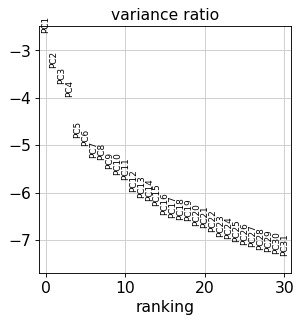

In [14]:
sc.pl.pca_variance_ratio(adata, log=True)

In [15]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 33468 × 5494
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [16]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)


In [17]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


In [25]:
sc.tl.leiden(adata, resolution = 0.02, key_added = "leiden")

running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


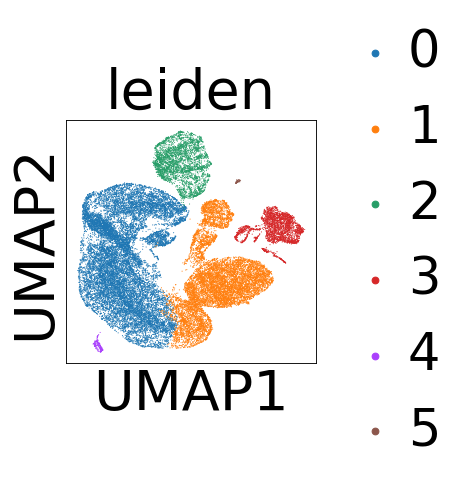

In [79]:
sc.pl.umap(adata, color='leiden')

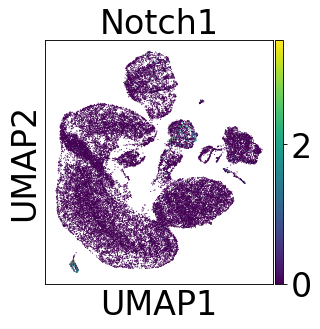

In [27]:
sc.pl.umap(adata, color=['Notch1'])
sc.set_figure_params(scanpy=True,fontsize=30)

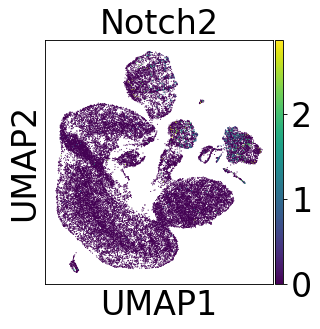

In [28]:
sc.pl.umap(adata, color=['Notch2'])
sc.set_figure_params(scanpy=True,fontsize=30)

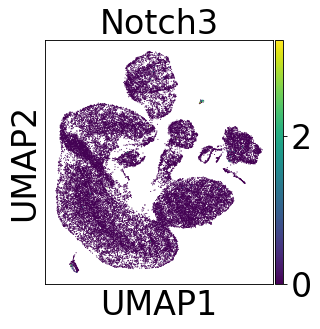

In [29]:
sc.pl.umap(adata, color=['Notch3'])
sc.set_figure_params(scanpy=True,fontsize=30)

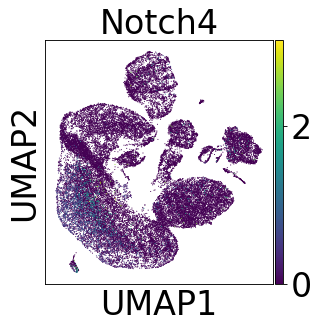

In [30]:
sc.pl.umap(adata, color=['Notch4'])
#sc.set_figure_params(scanpy=True,fontsize=15)

In [74]:
marker_genes_1 = {
    'Sperm':['Prm1'],     # PMID 2006171
    'ST':['Hspa1l'],      # PMID 32231871
    'SC':['Ccna1'],       # PMID 28301569
    'Spg':['Dmrt1'],      # PMID 16397242
    'Sertoli':['Wt1'],    # PMID 23935527
    'Leydig':['Cyp17a1'], # PMID 12193547
    'Int':['Acta2']       # PMID 16325810
}

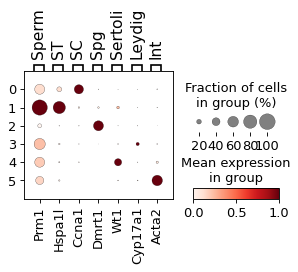

In [75]:
sc.pl.dotplot(adata, marker_genes_1, 'leiden', dendrogram=False,standard_scale='var')
sc.set_figure_params(scanpy=True,fontsize=14)

In [40]:
annotation_list = {
    '0':'0: Sperm',
    '1':'1: ST',
    '2':'2: Spg',
    '3':'3: Leydig',
    '4':'4: Sertoli',
    '5':'5: Int'
}

... storing 'cell_type' as categorical


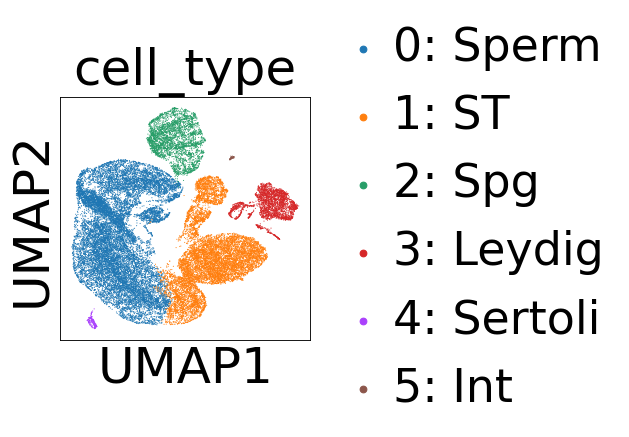

In [77]:
adata.obs['cell_type'] = [annotation_list[clust] for clust in adata.obs['leiden']]

sc.pl.umap(adata, color = 'cell_type')
sc.set_figure_params(scanpy=True,fontsize=50)

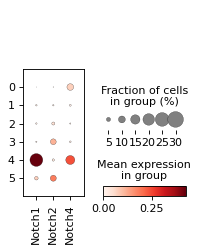

In [81]:
sc.pl.dotplot(adata, ['Notch1','Notch2','Notch4'], groupby='leiden')
sc.set_figure_params(scanpy=True,fontsize=8)

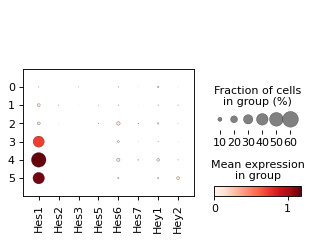

In [53]:
sc.pl.dotplot(adata, ['Hes1','Hes2','Hes3','Hes5','Hes6','Hes7','Hey1','Hey2'], groupby='leiden')
sc.set_figure_params(scanpy=True,fontsize=16)

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:08)


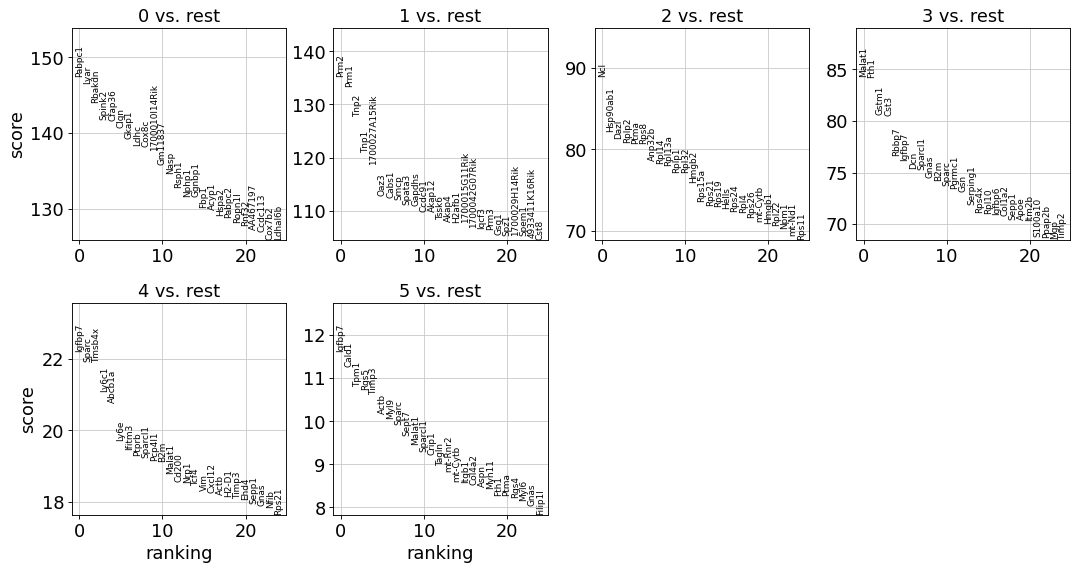

In [54]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")